## 5.3 Iris flower extended data set –Classification using different Algorithms

Continuing with the Iris dataset, suppose that we have Iris already identified in the 3 classes but
now we have also the Iris packed in different types of packages: “Simple – 0”, “Gift – 1” and “Luxury
– 3”. We also have a new variable “price” with three possibilities: “Low”, “Medium”, “High”. 

We have now a different classification problem in which we want to predict the “price” classification
based on the remaining characteristics: `sepal_length_cm`, `sepal_width_cm`, `petal_length_cm`,
`petal_width_cm`, `iris_type`, and `package`.

**a)** Create a new notebook and start by importing the needed libraries. 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

**b)** Read the data from the CSV file and check the data using the `head()`, `describe()`, and other
Pandas commands. 

In [17]:
df = pd.read_csv(os.getcwd() + "/iris-data-new2.csv")

In [18]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


In [19]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


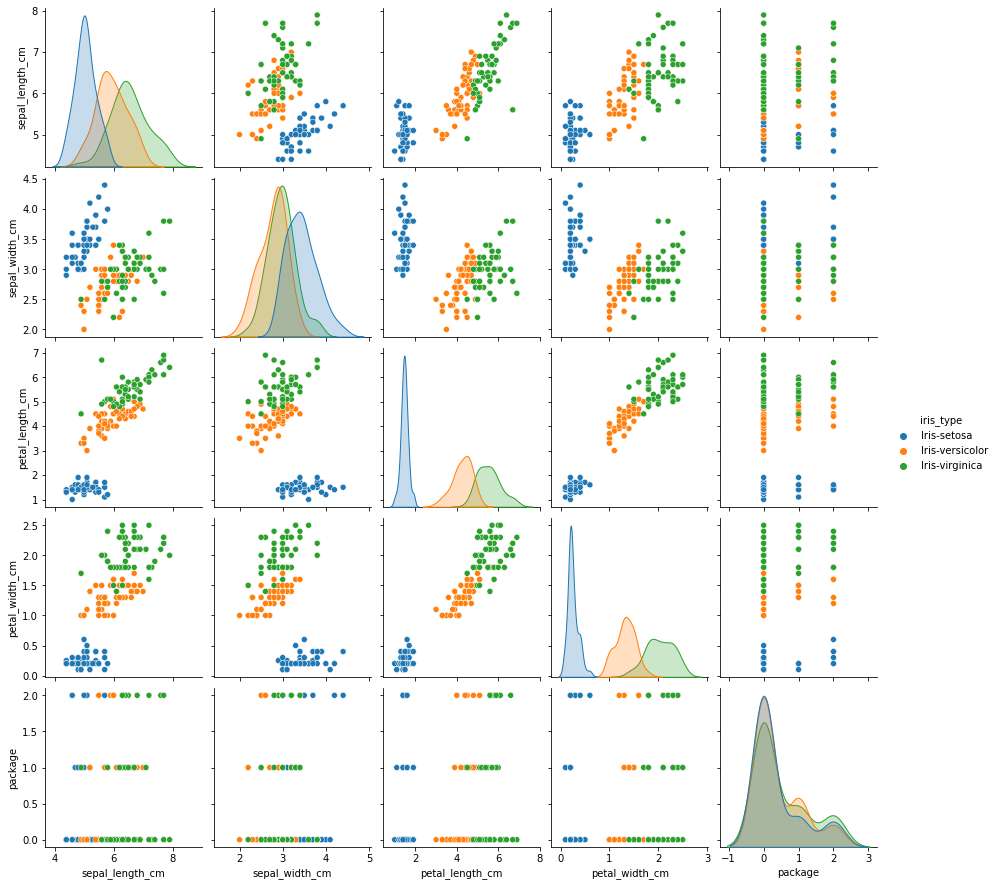

In [20]:
sns.pairplot(df, hue='iris_type');

**c)** Using only the `sepal_length_cm`, `sepal_width_cm`, `petal_length_cm`, `petal_width_cm`, fit a simple decision tree model to the data.

In [21]:
x = df[["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]].values
x.shape

(149, 4)

In [22]:
y = df["price"].values
y.shape

(149,)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.25)
clf = DecisionTreeClassifier(criterion='entropy')

Training the decision tree classifier. 

In [36]:
clf.fit(x_train, y_train);

**d)** Analyse the accuracy, precision, recall and f-measure achieved.


In [42]:
print('Accuracy Score on test data: ', accuracy_score(y_test, clf.predict(x_test)))
print("Precision Score on test data ", precision_score(y_test, clf.predict(x_test), average='weighted'))
print("Recall Score on test data ", recall_score(y_test, clf.predict(x_test), average='weighted'))
print("F-Measure on test data ", f1_score(y_test, clf.predict(x_test), average='weighted'))

Accuracy Score on test data:  0.7894736842105263
Precision Score on test data  0.813475997686524
Recall Score on test data  0.7894736842105263
F-Measure on test data  0.7890846851052242


**e)** Create and analyse a confusion matrix of the results. 


In [38]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 4,  0,  3],
       [ 0, 18,  2],
       [ 0,  3,  8]], dtype=int64)

**f)** Using only the attribute `sepal_length_cm`, `sepal_width_cm`, `petal_length_cm`, `petal_width_cm`, fit a simple nearest neighbor model to the data.


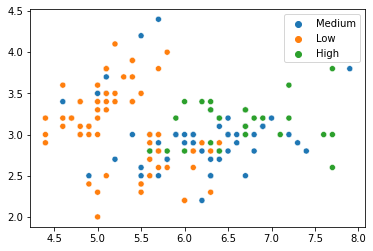

In [59]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y);

**g)** Analyse the accuracy, precision, recall and f-measure achieved.


In [61]:
print('Accuracy Score on test data: ', accuracy_score(y_test, clf.predict(x_test)))
print("Precision Score on test data ", precision_score(y_test, clf.predict(x_test), average='weighted'))
print("Recall Score on test data ", recall_score(y_test, clf.predict(x_test), average='weighted'))
print("F-Measure on test data ", f1_score(y_test, clf.predict(x_test), average='weighted'))

Accuracy Score on test data:  0.7894736842105263
Precision Score on test data  0.8479102167182662
Recall Score on test data  0.7894736842105263
F-Measure on test data  0.7988721804511278


**h)** Fit distinct models such as decision trees, SVM and neural networks to the data and try different configuration parameters.